##  Effect of delay intervals of teacher joining the live class on student's attendance in lectures.



#### Dataframe:For a respective teacher we have calculated average delay time of all the lectures conducted by them. For each distinct teacher we have average strength of students/present students/attendance% in all the lectures conducted by them.


#### In the data we have excluded the lectures of teacher where the present students is zero. 

#### Delay is the difference between the scheduled time of the lecture and the actual start time of the lecture. The actual start time of the lecture is extracted when the teacher starts the class for the first time. Excluded the cases where teacher starts the class and leaves the class multiple times or in case of power cut or internet issue. The very first time when teacher clicks on start live class is considered here. 

**Attendance is the present students divided by the total strength of students of the lecture.**



In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv("C:/Users/Apoorva/OneDrive/Documents/ML_Practice/DataSets-Practice ML/teach_class.csv")

In [34]:
# df['week'] = pd.to_datetime(df['week'])

In [35]:
df

,teacher_id,delay_diff_min,strength,present,attendance
0,23,3.033621,48.409483,39.724138,81.331143
1,45,-1.041715,44.994152,32.713450,72.358714
2,50,-0.533224,38.546053,20.730263,53.150183
3,82,1.201471,47.941176,40.470588,84.120424
4,87,0.771449,32.086957,27.704348,86.236411
...,...,...,...,...,...
5498,11208,-2.408333,82.500000,4.750000,6.157658
5499,11212,1.164286,48.428571,14.142857,30.861611
5500,11254,-0.097436,34.615385,25.153846,72.091024
5501,11296,-0.825000,18.500000,18.000000,97.293494


In [36]:
df['delay_diff_min']=df['delay_diff_min'].astype(int)
df['strength']=df['strength'].astype(int)
df['present']=df['present'].astype(int)
df['attendance']=df['attendance'].astype(int)


### The dataframe

In [37]:
df

,teacher_id,delay_diff_min,strength,present,attendance
0,23,3,48,39,81
1,45,-1,44,32,72
2,50,0,38,20,53
3,82,1,47,40,84
4,87,0,32,27,86
...,...,...,...,...,...
5498,11208,-2,82,4,6
5499,11212,1,48,14,30
5500,11254,0,34,25,72
5501,11296,0,18,18,97


In [38]:
conditions = [
    (df['delay_diff_min'] <= 0),
    (df['delay_diff_min'] >= 0) & (df['delay_diff_min'] <= 1),
    (df['delay_diff_min'] >= 2) & (df['delay_diff_min'] <= 3),
    (df['delay_diff_min'] >= 4) & (df['delay_diff_min'] <= 5),
    (df['delay_diff_min'] >= 6) & (df['delay_diff_min'] <= 8),
    (df['delay_diff_min'] >= 9) & (df['delay_diff_min'] <= 10),
    (df['delay_diff_min'] >= 11) & (df['delay_diff_min'] <= 12),
    (df['delay_diff_min'] >= 13) & (df['delay_diff_min'] <= 14),
    (df['delay_diff_min'] >= 15) & (df['delay_diff_min'] <= 18),
    (df['delay_diff_min'] >= 19) & (df['delay_diff_min'] <= 20),
    (df['delay_diff_min'] >= 21)
    ]


### Creating a list of the values we want to assign for each condition



In [39]:

values = ['no_delay', 'delay_0-1min',  'delay_2-3min', 'delay_4-5min', 
          'delay_6-8min', 'delay_9-10min', 'delay_11-12min', 'delay_13-14min', 
          'delay_15-18min', 'delay_19-20min',  'delay_>21min']



### Creating a new column and using np.select to assign values to it using our lists as arguments


In [40]:
df['delay_Category'] = np.select(conditions, values)

In [41]:
df

,teacher_id,delay_diff_min,strength,present,attendance,delay_Category
0,23,3,48,39,81,delay_2-3min
1,45,-1,44,32,72,no_delay
2,50,0,38,20,53,no_delay
3,82,1,47,40,84,delay_0-1min
4,87,0,32,27,86,no_delay
...,...,...,...,...,...,...
5498,11208,-2,82,4,6,no_delay
5499,11212,1,48,14,30,delay_0-1min
5500,11254,0,34,25,72,no_delay
5501,11296,0,18,18,97,no_delay


In [42]:
df.groupby('delay_Category').nunique()

,teacher_id,delay_diff_min,strength,present,attendance
delay_Category,,,,,
delay_0-1min,1280,1,181,107,85
delay_11-12min,2,2,2,2,2
delay_13-14min,2,1,2,2,2
delay_15-18min,4,2,4,4,4
delay_19-20min,2,1,2,2,2
delay_2-3min,949,2,153,88,87
delay_4-5min,131,2,85,56,64
delay_6-8min,23,3,20,17,21
delay_9-10min,12,2,12,9,10


### Counting teachers in each delay category:-

In [19]:
df.groupby('delay_Category')['teacher_id'].count()

delay_Category
delay_0-1min      1280
delay_11-12min       2
delay_13-14min       2
delay_15-18min       4
delay_19-20min       2
delay_2-3min       949
delay_4-5min       131
delay_6-8min        23
delay_9-10min       12
delay_>21min         4
no_delay          3094
Name: teacher_id, dtype: int64

### Plotting attendance for all delay categories of teacher. 

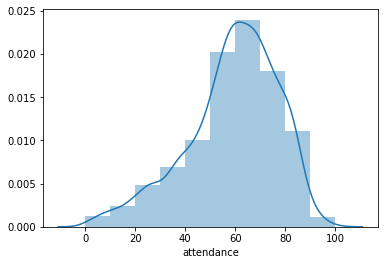

In [20]:
sns.distplot((df[df['delay_Category']=='no_delay']['attendance']), bins=10)

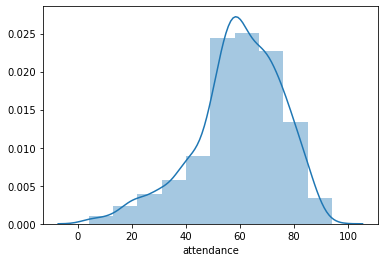

In [21]:
sns.distplot((df[df['delay_Category']=='delay_0-1min']['attendance']), bins=10)

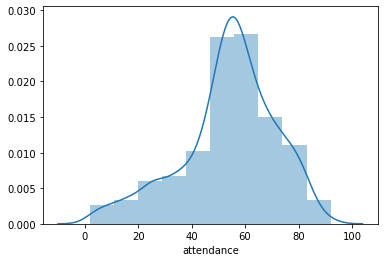

In [22]:
sns.distplot((df[df['delay_Category']=='delay_2-3min']['attendance']), bins=10)

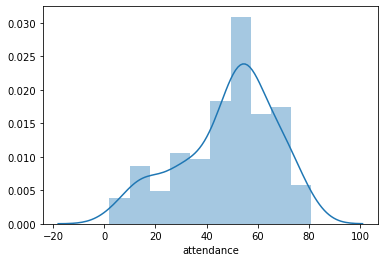

In [23]:
sns.distplot((df[df['delay_Category']=='delay_4-5min']['attendance']), bins=10)

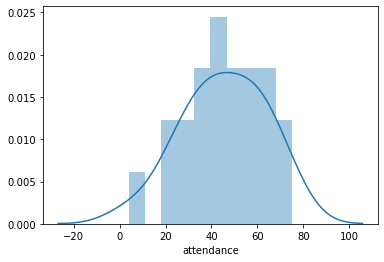

In [24]:
sns.distplot((df[df['delay_Category']=='delay_6-8min']['attendance']), bins=10)

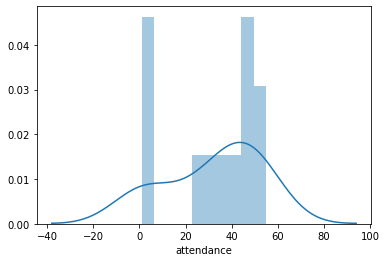

In [25]:
sns.distplot((df[df['delay_Category']=='delay_9-10min']['attendance']), bins=10)

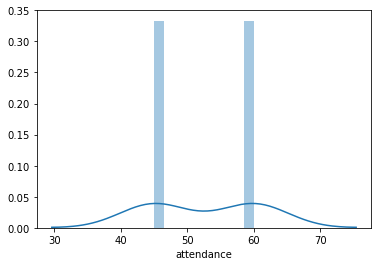

In [26]:
sns.distplot((df[df['delay_Category']=='delay_11-12min']['attendance']), bins=10)

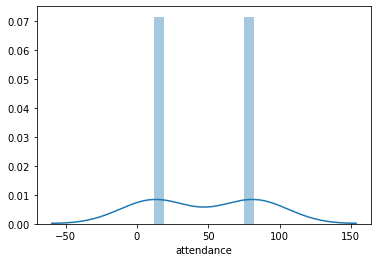

In [27]:
sns.distplot((df[df['delay_Category']=='delay_13-14min']['attendance']), bins=10)

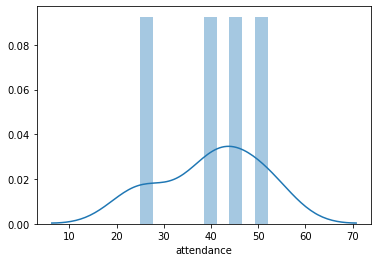

In [28]:
sns.distplot((df[df['delay_Category']=='delay_15-18min']['attendance']), bins=10)


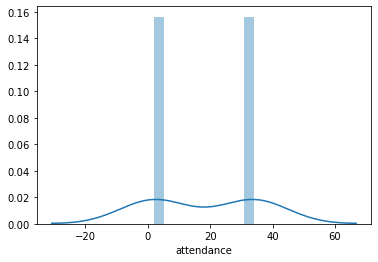

In [29]:
sns.distplot((df[df['delay_Category']=='delay_19-20min']['attendance']), bins=10)


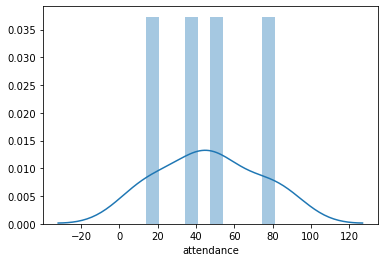

In [30]:
sns.distplot((df[df['delay_Category']=='delay_>21min']['attendance']), bins=10)


### As you can see in the above plots for teachers whose average delay>10min, attendance reduces drastically. 

### The difference with the previous notebook: 
### Earlier we plotted attendance for lectures with various delays of teacher. Here we plotted average attendance of students of all lectures for a respective teacher post calculating average delays of each teacher joining the live class. We did this in order to be crystal clear of the analysis. 